In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [32]:

spotify_df = pd.read_csv("/Users/brennanrose/Documents/CodeYou/Module_2/Week_2/learning_plots_brennanRose/data/Cleaned_Spotify_2024_Global_Streaming_Data.csv")

spotify_df.head()

,Country,Artist,Album,Genre,Release Year,Monthly Listeners (Millions),Total Streams (Millions),Total Hours Streamed (Millions),Avg Stream Duration (Min),Platform Type,Streams Last 30 Days (Millions),Skip Rate (%)
0,Germany,Taylor Swift,1989 (Taylor's Version),K-pop,2020,23.10,3695.53,14240.35,4.28,Free,118.51,2.24
1,Brazil,The Weeknd,After Hours,R&B,2023,60.60,2828.16,11120.44,3.90,Premium,44.87,23.98
2,United States,Post Malone,Austin,Reggaeton,2019,42.84,1425.46,4177.49,4.03,Free,19.46,4.77
3,Italy,Ed Sheeran,Autumn Variations,K-pop,2019,73.24,2704.33,12024.08,3.26,Premium,166.05,25.12
4,Italy,Ed Sheeran,Autumn Variations,R&B,2019,7.89,3323.25,13446.32,4.47,Free,173.43,15.82


#### Group by genre and calculate the average total streams

In [33]:
avg_streams = spotify_df.groupby('Genre')['Total Streams (Millions)'].mean().sort_values(ascending=False)
avg_streams

Genre
R&B          2779.311707
K-pop        2760.691667
Classical    2739.955417
Pop          2686.797500
Indie        2661.669400
Rock         2558.947069
EDM          2466.699804
Jazz         2408.460000
Reggaeton    2404.313636
Hip Hop      2284.867551
Name: Total Streams (Millions), dtype: float64

#### Box Charts

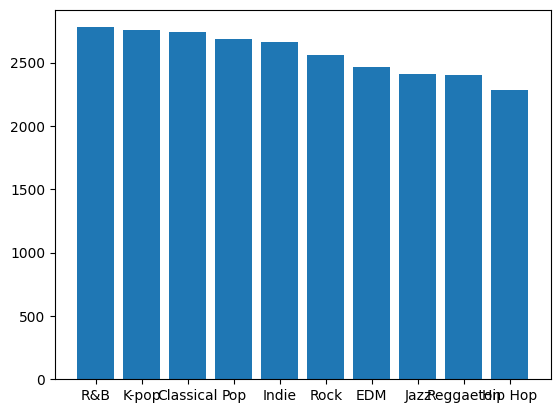

In [ ]:
plt.bar(avg_streams.index, avg_streams.values) #.index is the index of Genere values is the calculation for the average
plt.show() # used for ploting multiple things

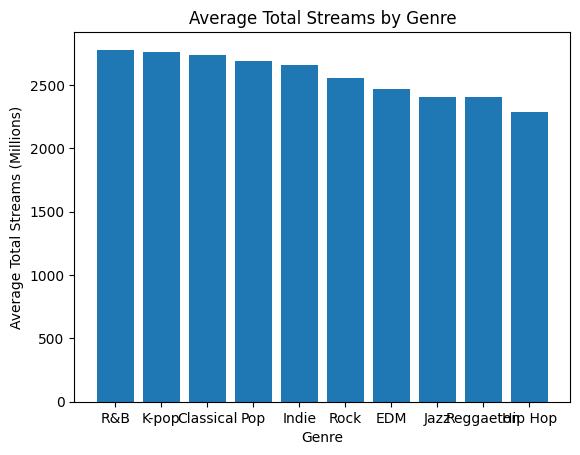

In [35]:
plt.bar(avg_streams.index, avg_streams.values)

plt.xlabel('Genre') # x-axis label
plt.ylabel('Average Total Streams (Millions)') # y-axis label
plt.title('Average Total Streams by Genre') # adding a title

plt.show()

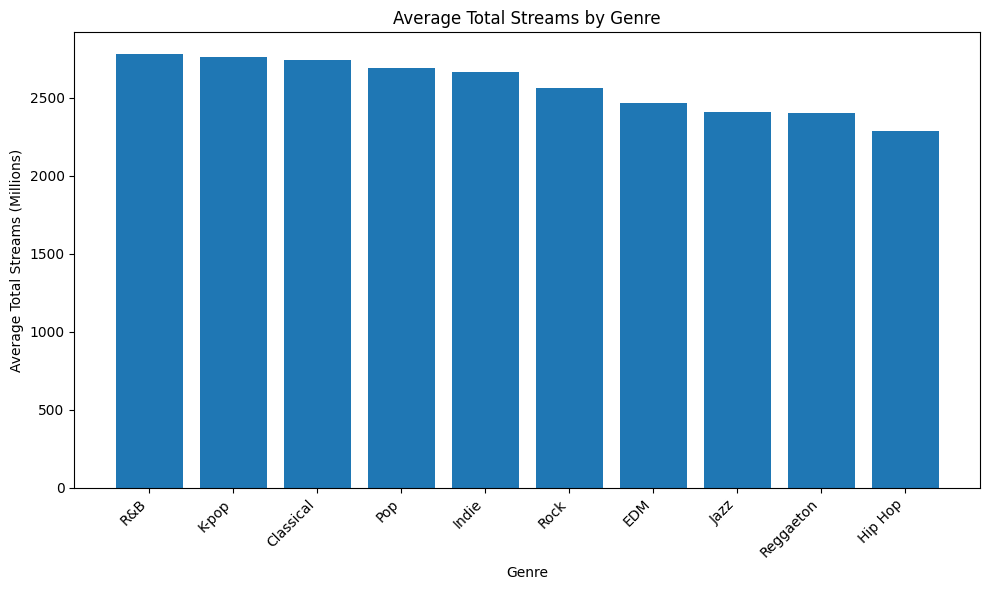

In [36]:
plt.figure(figsize=(10,6)) # adjusting the size of the chart for better viewing
plt.bar(avg_streams.index, avg_streams.values)

plt.xlabel('Genre')
plt.ylabel('Average Total Streams (Millions)')
plt.title('Average Total Streams by Genre')
plt.xticks(rotation=45, ha='right') # rotating the bar labels 45 degrees, right aligned

plt.tight_layout() # makes graph have nice spacing and looks nice for different computers
plt.show()

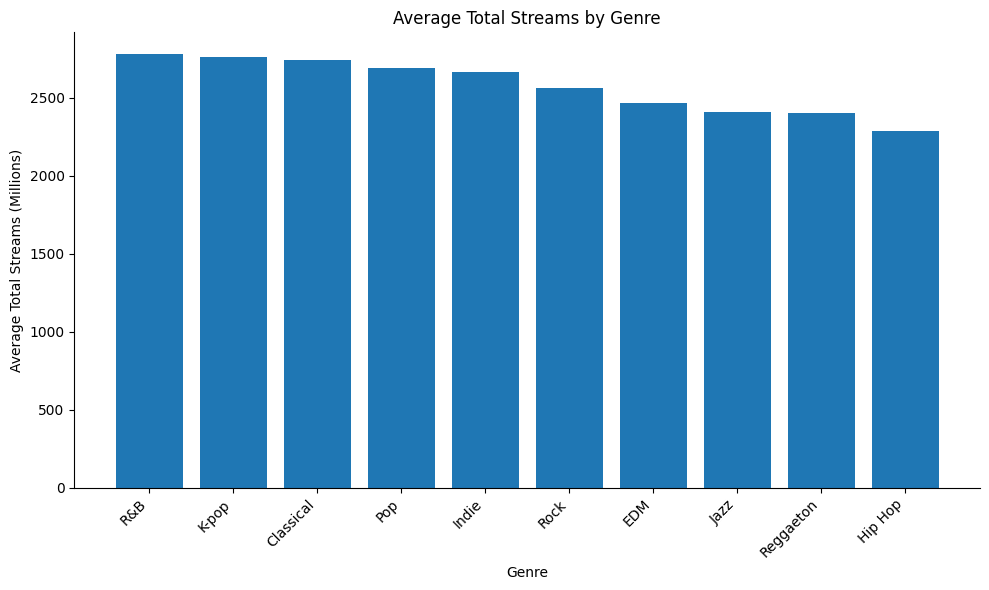

In [37]:
plt.figure(figsize=(10,6))
plt.bar(avg_streams.index, avg_streams.values)

ax = plt.gca() #gca = get current axes, get the axes object for the current figure to work with it directly
ax.spines['top'].set_visible(False) # removing the borders or 'spines' around the chart on the top and the right.
ax.spines['right'].set_visible(False)

plt.xlabel('Genre')
plt.ylabel('Average Total Streams (Millions)')
plt.title('Average Total Streams by Genre')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

#### Group by Artist and calculate averge total streams

In [38]:
avg_artist_streams = spotify_df.groupby('Artist')['Total Streams (Millions)'].mean().sort_values(ascending=False)
avg_artist_streams 

Artist
Dua Lipa          3008.270000
Ariana Grande     2869.031111
BTS               2824.987955
BLACKPINK         2763.213243
Bad Bunny         2655.404000
Billie Eilish     2650.803548
Doja Cat          2649.965588
Drake             2611.255161
The Weeknd        2523.978000
Ed Sheeran        2510.267143
Olivia Rodrigo    2481.721765
Post Malone       2415.280323
Karol G           2344.262432
Taylor Swift      2270.203333
SZA               1919.527000
Name: Total Streams (Millions), dtype: float64

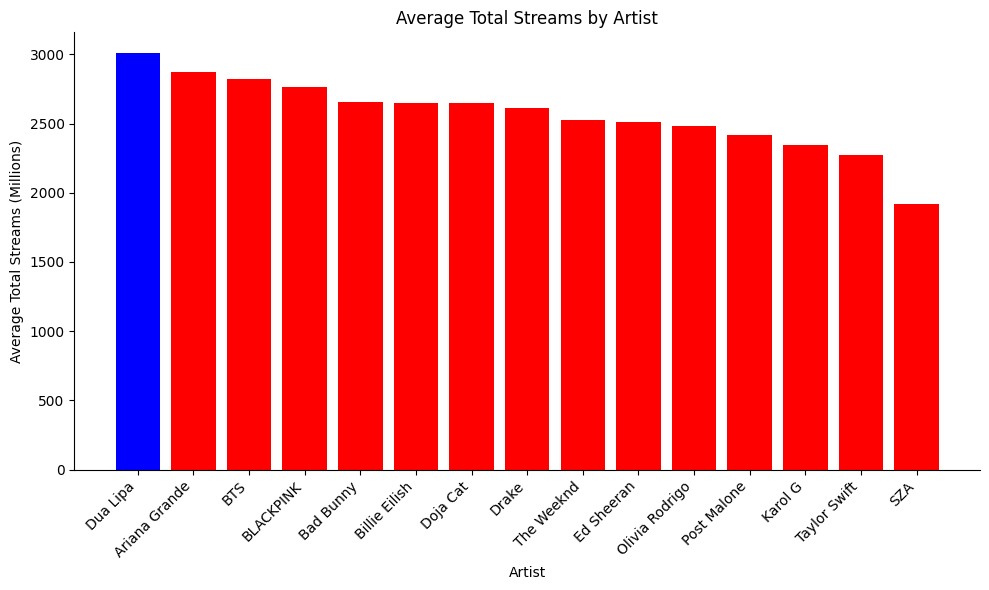

In [39]:
plt.figure(figsize=(10,6))
colors = ['red'] * len(avg_artist_streams) #create a list of colors for however many bars there are

max_index = avg_artist_streams.idxmax() #select a bar in the graph that gives you the index of the maximum value in the list of values
highlight_position = avg_artist_streams.index.get_loc(max_index) # finds the index of the maximum value and store in the variable 'highlight_position'
colors[highlight_position] = 'blue' # sets a specifc color for the highligh_position variable

plt.bar(avg_artist_streams.index, avg_artist_streams.values, color = colors, width = 0.8) # can set color = specific color, or create another variable with list of colors.
# can get colors from 'color brewer' or 'colors'
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.xlabel('Artist')
plt.ylabel('Average Total Streams (Millions)')
plt.title('Average Total Streams by Artist')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

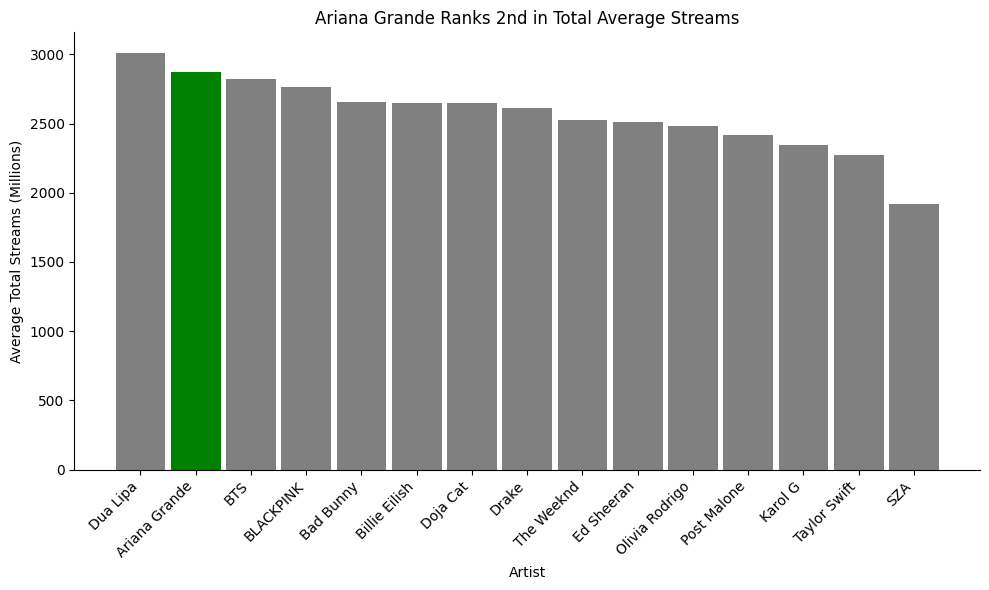

In [113]:
plt.figure(figsize=(10,6))
special_artist = 'Ariana Grande'
colors = ['green' if artist == special_artist else 'gray' for artist in avg_artist_streams.index]

plt.bar(avg_artist_streams.index, avg_artist_streams.values, color = colors, width = 0.9)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.xlabel('Artist')
plt.ylabel('Average Total Streams (Millions)')
plt.title('Ariana Grande Ranks 2nd in Total Average Streams')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.savefig("../plots/AverageStreamsBar.png")
plt.show()

#### Scatter Plots

In [41]:
spotify_df.columns
spotify_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          500 non-null    object 
 1   Artist                           500 non-null    object 
 2   Album                            500 non-null    object 
 3   Genre                            500 non-null    object 
 4   Release Year                     500 non-null    int64  
 5   Monthly Listeners (Millions)     500 non-null    float64
 6   Total Streams (Millions)         500 non-null    float64
 7   Total Hours Streamed (Millions)  500 non-null    float64
 8   Avg Stream Duration (Min)        500 non-null    float64
 9   Platform Type                    500 non-null    object 
 10  Streams Last 30 Days (Millions)  500 non-null    float64
 11  Skip Rate (%)                    500 non-null    float64
dtypes: float64(6), int64(1

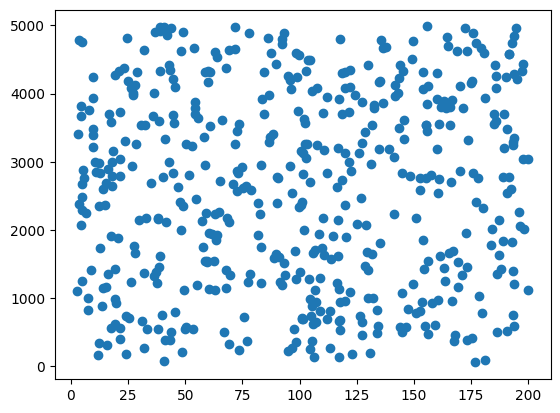

In [42]:
plt.scatter(spotify_df['Streams Last 30 Days (Millions)'], spotify_df['Total Streams (Millions)'])
plt.show()

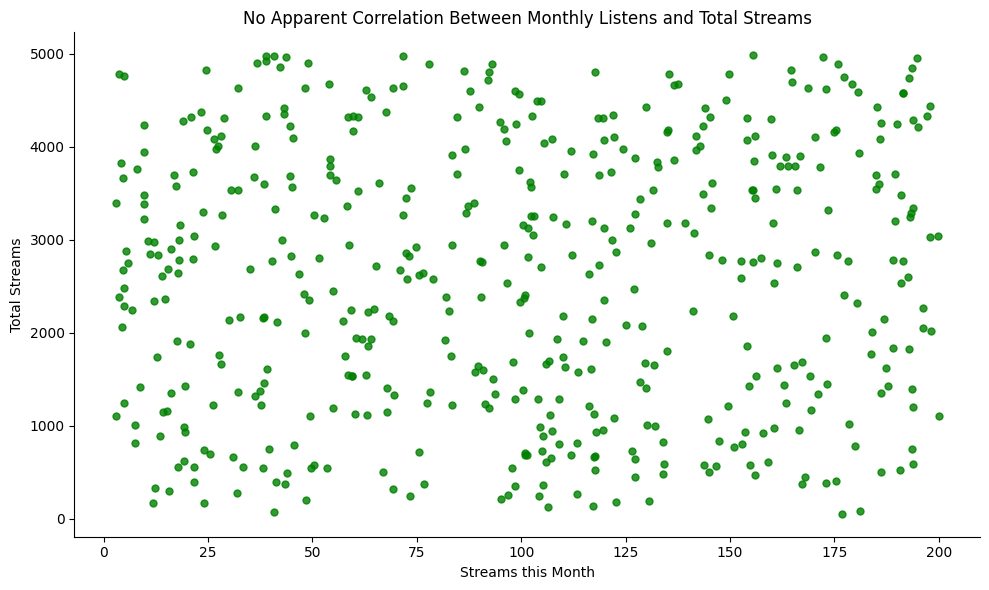

In [43]:
plt.figure(figsize=(10,6))

plt.scatter(
    spotify_df['Streams Last 30 Days (Millions)'], 
    spotify_df['Total Streams (Millions)'],
    color = 'green',
    alpha = 0.8, # makes the points less solid, 1 is fully solid, transparency
    s = 25 # change point size
    )


plt.xlabel("Streams this Month")
plt.ylabel("Total Streams")
plt.title("No Apparent Correlation Between Monthly Listens and Total Streams")

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

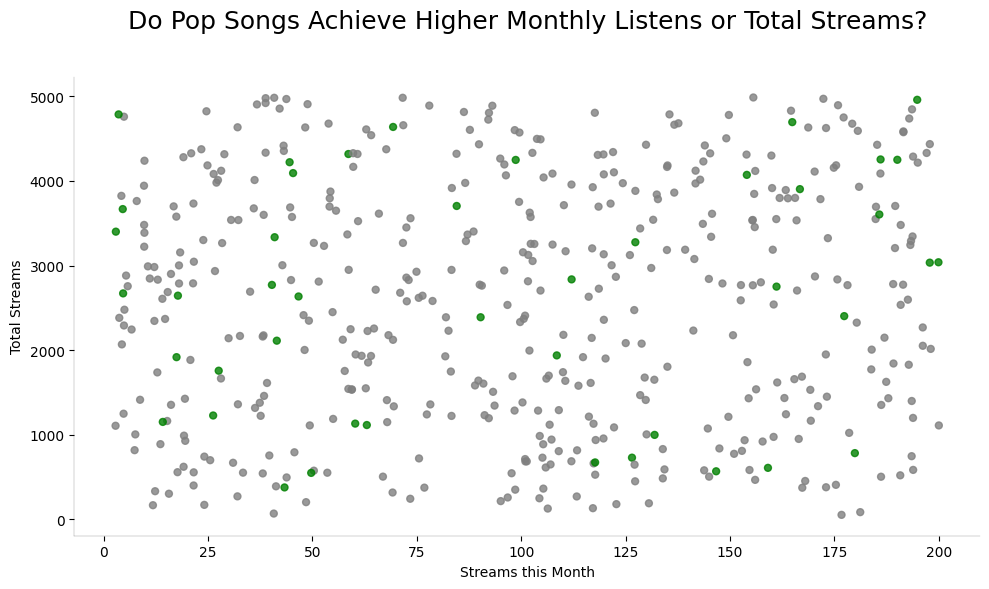

In [44]:
plt.figure(figsize=(10,6))

featured_genre = "Pop"

# use a for loop to go through each genre in the data frame, change color to green if == to featured genre, else change colore to gray
colors = ['green' if genre == featured_genre else 'gray' for genre in spotify_df["Genre"]]

plt.scatter(
    spotify_df['Streams Last 30 Days (Millions)'], 
    spotify_df['Total Streams (Millions)'],
    color = colors,
    alpha = 0.8, # makes the points less solid, 1 is fully solid, transparency or opaque
    s = 25 # change point size
    )


plt.xlabel("Streams this Month")
plt.ylabel("Total Streams")
# plt.title("No Apparent Correlation Between Monthly Listens and Total Streams")

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_title("Do Pop Songs Achieve Higher Monthly Listens or Total Streams?", fontsize = 18, pad = 35) # uses ax to set the title, change fontsize and padding

# use a forloop to go through all four spines
for spine in ax.spines.values():
    spine.set_linewidth(0.25)
    spine.set_alpha(0.5)

plt.tight_layout()
plt.show()

#### Line Charts

In [47]:
yearly_avg = spotify_df.groupby("Release Year")["Total Streams (Millions)"].mean().round(2)

yearly_avg

Release Year
2018    2611.26
2019    2516.45
2020    2569.62
2021    2763.21
2022    2367.99
2023    2817.97
Name: Total Streams (Millions), dtype: float64

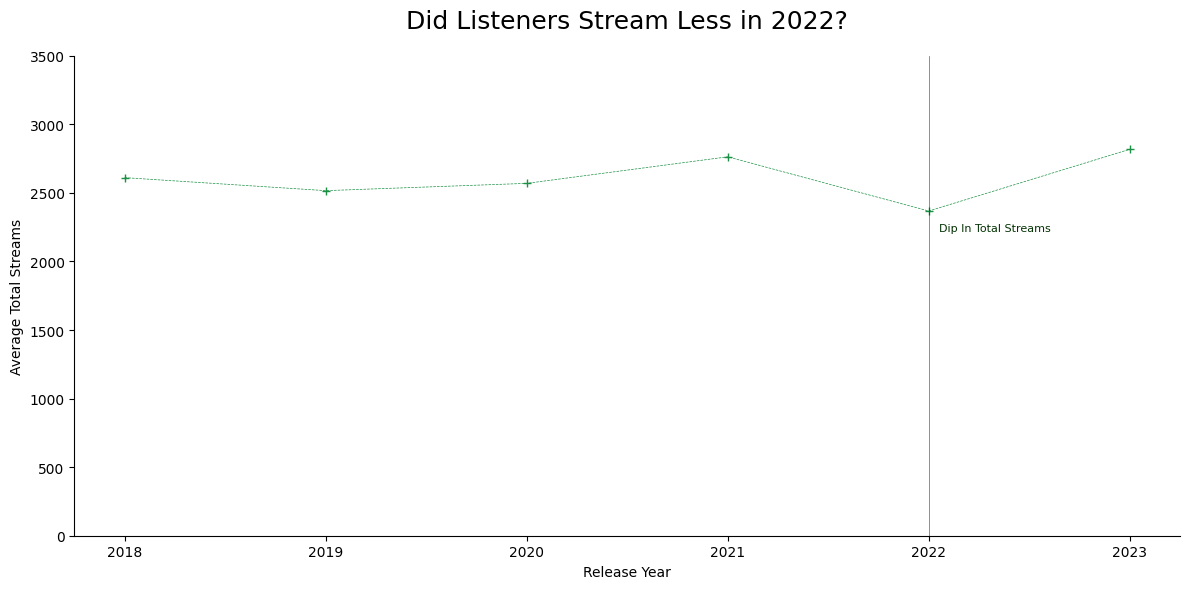

In [112]:
plt.figure(figsize=(12,6))
plt.plot(
    yearly_avg.index, # x and y axis
    yearly_avg.values,
    marker='+', # changes the marker on the line chart
    linestyle = '--', #changes the style of the line
    color = "#1C9045",
    linewidth = 0.5, # changes the line width of the line chart
    ) 

plt.xlabel('Release Year')
plt.ylabel('Average Total Streams')
plt.title('Did Listeners Stream Less in 2022?', fontsize = 18, pad=20)

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.axvline(# can add a verticle line wherever you tell it to go
    2022,
    color = "#043204",
    linewidth = 0.5,
    alpha = 0.70, # adjust the transparency of the line
    )

ax.text(#adds text to the axes objext
    2022+0.05, # where you want the text to be on the x axis
    2225, # where you want the text to be on the y axis
    'Dip In Total Streams', # the text you want to display
    color = '#043204',
    fontsize = 8
) 

plt.ylim(0, 3500) # get or set the y-limits of the current axes.

plt.tight_layout()
plt.savefig("../plots/StreamsLineChart.png")
plt.show()

#### Pie Charts

In [62]:
category = 'Platform Type'
values = 'Total Streams (Millions)'

platform_totals = spotify_df.groupby(category)[values].sum()
platform_totals

Platform Type
Free       638685.97
Premium    651891.07
Name: Total Streams (Millions), dtype: float64

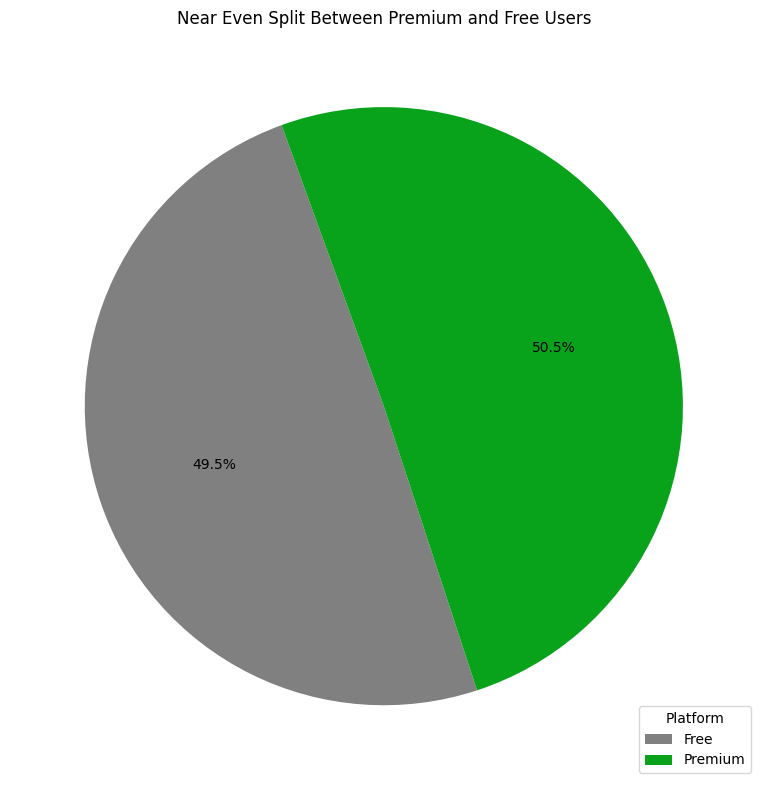

In [74]:
plt.figure(figsize=(8,8))
plt.pie(
    platform_totals,
    labels=None,
    startangle=110, #changes the angle of the chart
    colors=['gray', "#09a21b"],
    autopct ='%1.1f%%' #displays the values of the pie slices
    )

plt.title('Near Even Split Between Premium and Free Users')

plt.legend( # adds a legend for the pie chart
    labels = platform_totals.index,
    loc='lower right', # 'best places the legend in the best location, can be changed if needed.
    title='Platform' # title of the legend
)

plt.tight_layout()
plt.show()

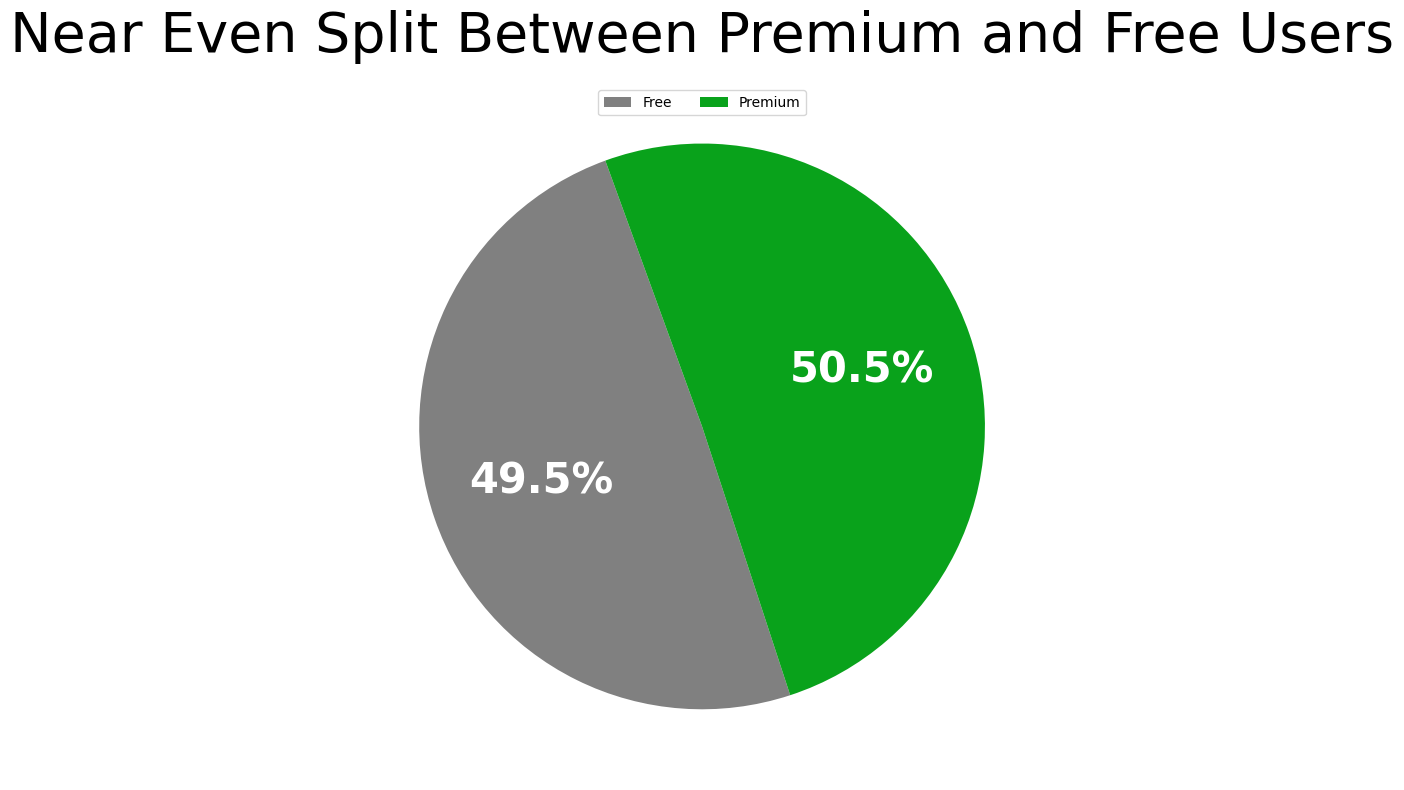

In [82]:
fig, ax = plt.subplots(figsize=(8,8))


wedges, text, autotexts = ax.pie(
    platform_totals,
    autopct ='%1.1f%%', #displays the values of the pie slices
    startangle=110, #changes the angle of the chart
    colors=['gray', "#09a21b"],
    
    )

ax.set_title(
    'Near Even Split Between Premium and Free Users',
    fontsize = 40,
    pad=15,
    loc='center'
)

for autotext in autotexts:
    autotext.set_fontsize(30)
    autotext.set_color('white')
    autotext.set_weight('bold')

ax.legend(
    wedges,
    platform_totals.index,
    loc='lower center',
    bbox_to_anchor = (0.5, 0.93), # allows you to move position very specific to the chart
    ncol= 2 # alows you to adjust columns side by side instead of up and down
)

plt.tight_layout()
plt.show()

#### Histograms

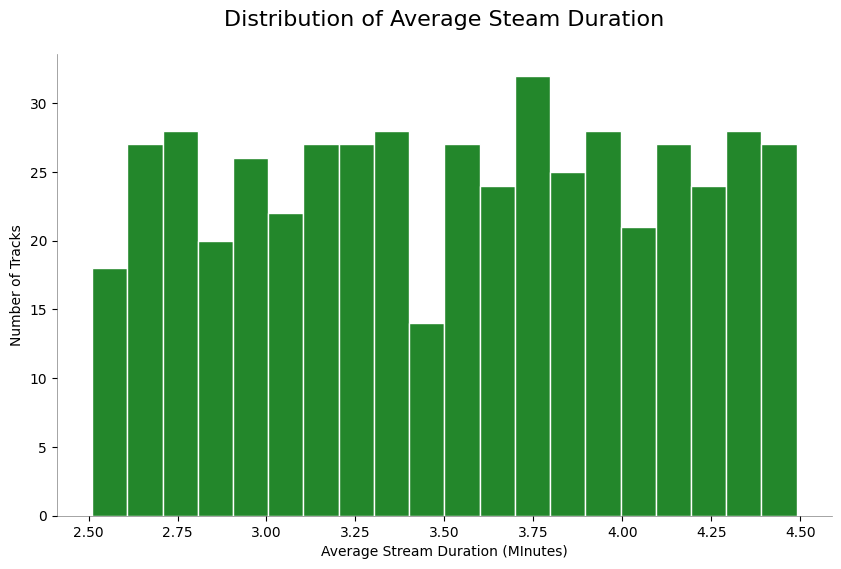

In [110]:
plt.figure(figsize=(10,6))
plt.hist(
    spotify_df['Avg Stream Duration (Min)'],
    bins=20,
    color="#23872B",
    edgecolor= 'white'
)

plt.xlabel("Average Stream Duration (MInutes)")
plt.ylabel("Number of Tracks")
plt.title("Distribution of Average Steam Duration", fontsize=16, pad=20)

ax = plt.gca()
for spine in ax.spines.values():
    spine.set_linewidth(0.5)
    spine.set_alpha(0.5)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.savefig("../plots/AverageStreamHistogram.png")
plt.show()

#### Box Plots

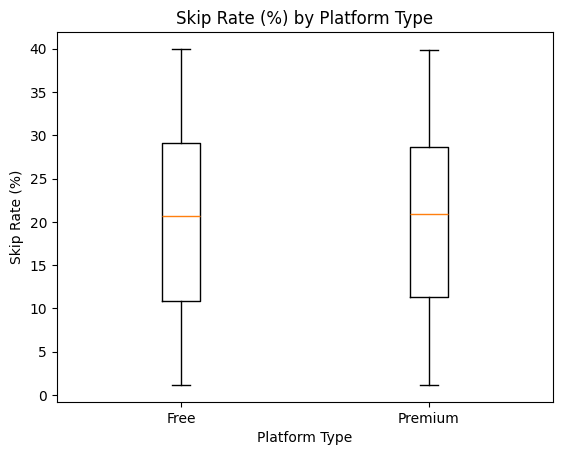

In [97]:
plt.boxplot(
    [spotify_df[spotify_df["Platform Type"]=="Free"]["Skip Rate (%)"],spotify_df[spotify_df['Platform Type']=="Premium"]["Skip Rate (%)"]]
)

plt.xticks([1,2],["Free", "Premium"])
plt.xlabel("Platform Type")
plt.ylabel("Skip Rate (%)")
plt.title("Skip Rate (%) by Platform Type")

plt.show()

#### Heatmaps

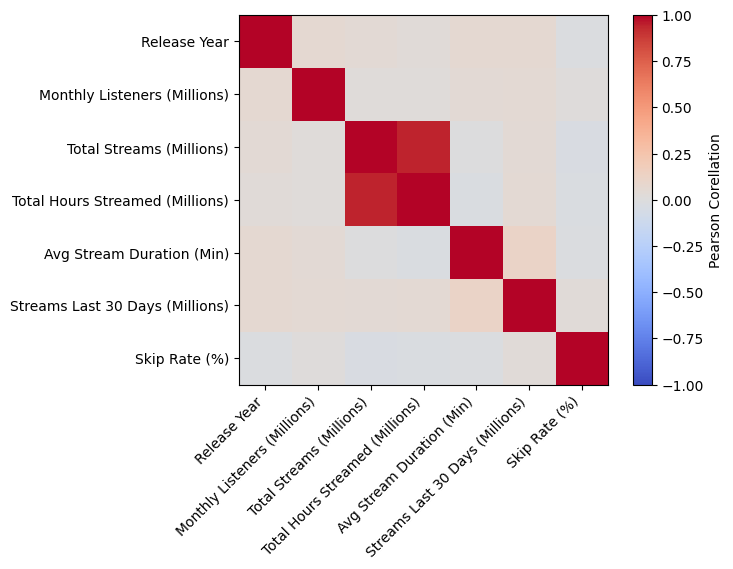

In [103]:
numeric_spotify_df = spotify_df.select_dtypes(include=[np.number]) # only gets the numerical variables of the data frame

corr = numeric_spotify_df.corr()

im = plt.imshow(corr, vmin=-1, vmax=1, cmap='coolwarm')

plt.colorbar(im, label="Pearson Corellation")

plt.xticks(range(len(corr.columns)), corr.columns, rotation=45, ha='right')
plt.yticks(range(len(corr.columns)), corr.columns)

plt.show()

#### Count Plots

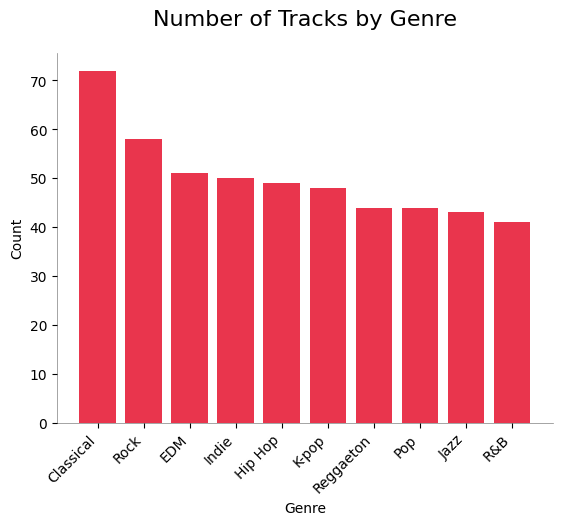

In [109]:
genre_counts = spotify_df['Genre'].value_counts().sort_values(ascending=False)
genre_counts

plt.bar(genre_counts.index, genre_counts.values, color="#e9354d")
plt.xticks(rotation=45, ha='right')

plt.xlabel("Genre")
plt.ylabel("Count")
plt.title("Number of Tracks by Genre", fontsize=16, pad=20)

ax = plt.gca()
for spine in ax.spines.values():
    spine.set_linewidth(0.5)
    spine.set_alpha(0.5)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()